In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.datasets import sunspots


In [17]:
data = sunspots.load_pandas().data
data.columns = ['date', 'sunspots']

In [18]:
# Convert year to datetime and set as index
data['date'] = pd.to_datetime(data['date'], format='%Y')
data.set_index('date', inplace=True)

In [19]:

ts = data['sunspots']


In [20]:
# ADF Test
result = adfuller(ts.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.8377807249381943
p-value: 0.053076421728120673
Critical Values: {'1%': np.float64(-3.4523371197407404), '5%': np.float64(-2.871222860740741), '10%': np.float64(-2.571929211111111)}


In [21]:
# Split into train/test
x = int(0.8 * len(data))
train_data = data.iloc[:x]
test_data = data.iloc[x:]

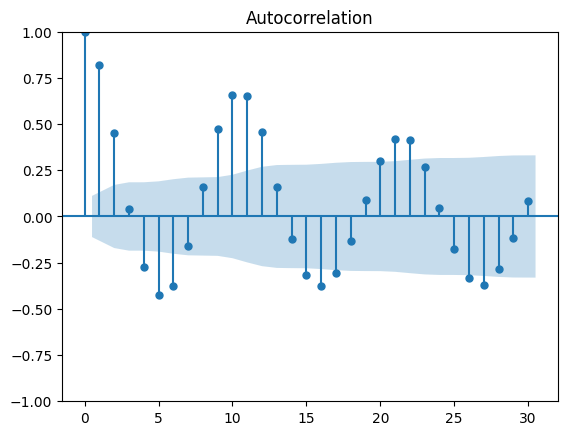

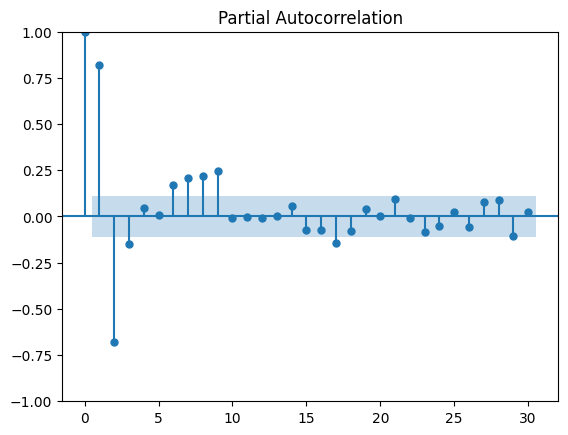

In [22]:
plot_acf(ts.dropna(), lags=30)
plot_pacf(ts.dropna(), lags=30)
plt.show()

In [23]:
train_size = int(len(ts) * 0.8)
train, test = ts[0:train_size], ts[train_size:]

In [24]:
# Ensure lag < number of training points
lags = min(5, len(train)-1)


In [25]:

# Fit AR model
model = AutoReg(train, lags=lags).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:               sunspots   No. Observations:                  247
Model:                     AutoReg(5)   Log Likelihood                -994.175
Method:               Conditional MLE   S.D. of innovations             14.720
Date:                Tue, 30 Sep 2025   AIC                           2002.351
Time:                        08:20:55   BIC                           2026.773
Sample:                    01-01-1705   HQIC                          2012.189
                         - 01-01-1946                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.3094      2.300      7.092      0.000      11.802      20.817
sunspots.L1     1.3023      0.065     19.963      0.000       1.174       1.430
sunspots.L2    -0.5486      0.106     -5.154    

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [26]:
# Forecast
preds = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [27]:
# MSE
error = mean_squared_error(test, preds)
print("MSE:", error)

MSE: 2996.150215835658


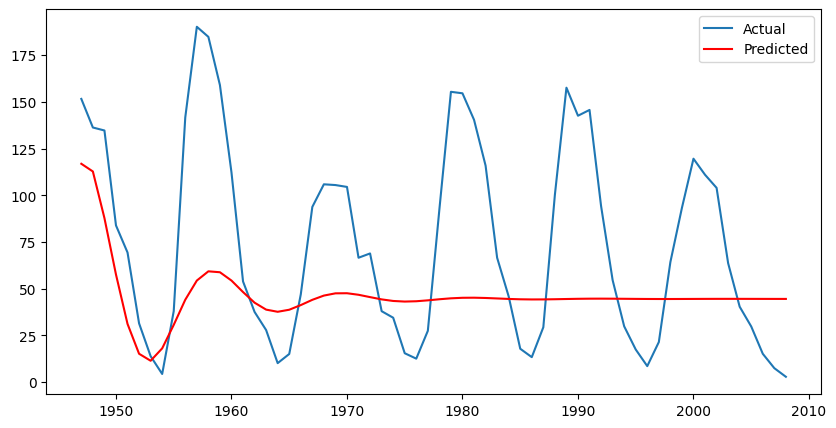

In [28]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', color='red')
plt.legend()
plt.show()